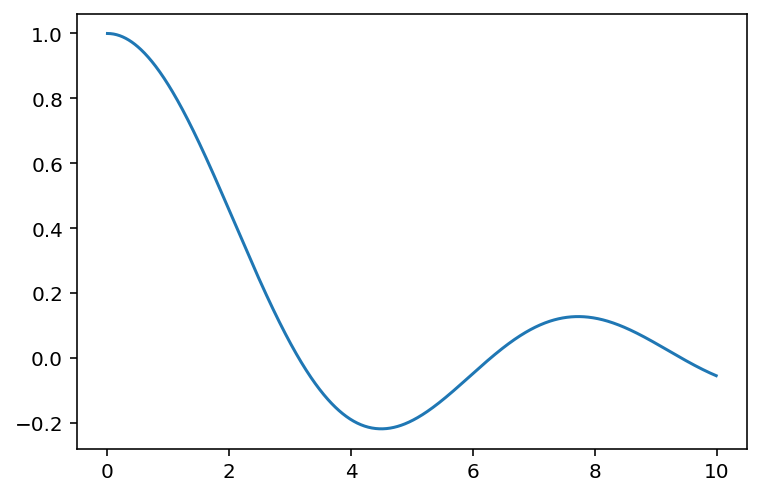

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

import pylab
from matplotlib import mlab

def Function (x):
    if x == 0:
        return 1.0
    return sin(x) / x

def Plot0(func):
    list_arg = np.arange(0.0, 10.0, 0.01)
    plt.plot(list_arg, [func(arg) for arg in list_arg])
    return
Plot0(Function)

In [2]:
def FFT(arr):
    if(len(arr) == 1) :
        return arr
    
    a_0 = FFT(arr[0::2])
    a_1 = FFT(arr[1::2])
    
    size = len(arr)
    fft = list(range(size))
    coeff = complex(1, 0)
    step = complex(cos(2 * pi / size), -sin(2 * pi / size))
    for k in range(size // 2):
        fft[k] = a_0[k] + a_1[k] * coeff
        fft[k + size // 2] = a_0[k] - a_1[k] * coeff
        coeff = step * coeff
    return fft

def FFTReverse(arr):
    arr = [x.conjugate() for x in arr]
    arr = FFT(arr)
    arr = [x.conjugate() / len(arr) for x in arr]
    return arr

In [3]:
def get_x_y(func, discr, T):
    step = T / discr
    return np.arange(0.0, T, step), np.array([func(x) for x in np.arange(0, T, step)])  

def Plot(func):
    x, y = get_x_y(func, 128, 10)
    g = FFT(y)  
    
    plt.plot(x, y)
    plt.plot(x, FFTReverse(g))  
    plt.plot(x, FFTReverse(g[:127] + [0])) #D = 0.7%
    plt.plot(x, FFTReverse(g[:126] + [0]*2)) #D = 1.5%
    plt.plot(x, FFTReverse(g[:125] + [0]*3)) #D = 2.3%
    plt.plot(x, FFTReverse(g[:124] + [0]*4)) #D = 3%
    plt.plot(x, FFTReverse(g[:64] + [0]*64)) #D = 50%
    
    plt.show()
    
    x, y = get_x_y(func, 128, 50)
    g = FFT(y)  
    
    plt.plot(x, y)
    plt.plot(x, FFTReverse(g))  
    plt.plot(x, FFTReverse(g[:127] + [0]))
    plt.plot(x, FFTReverse(g[:126] + [0]*2))
    plt.plot(x, FFTReverse(g[:125] + [0]*3))   
    plt.plot(x, FFTReverse(g[:124] + [0]*4))
    plt.plot(x, FFTReverse(g[:64] + [0]*64))
    
    plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


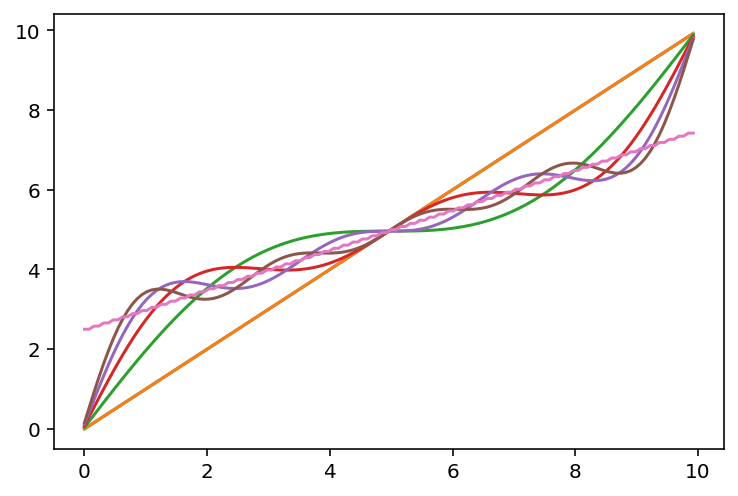

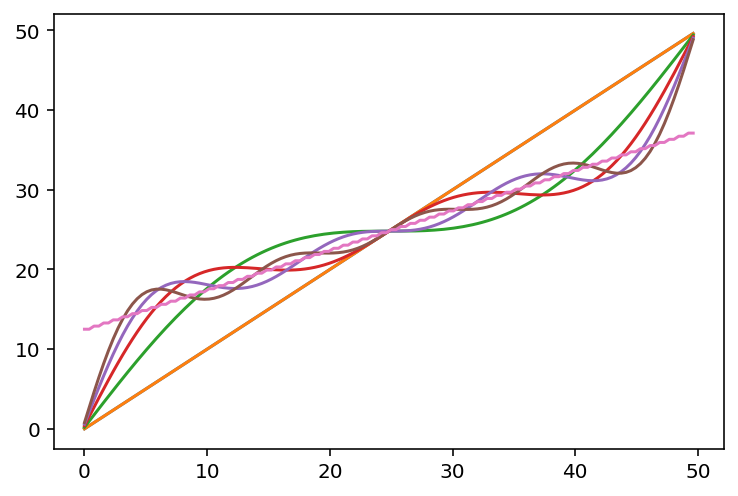

In [4]:
Plot(lambda x: x)
#разница видна при D < 0.7%

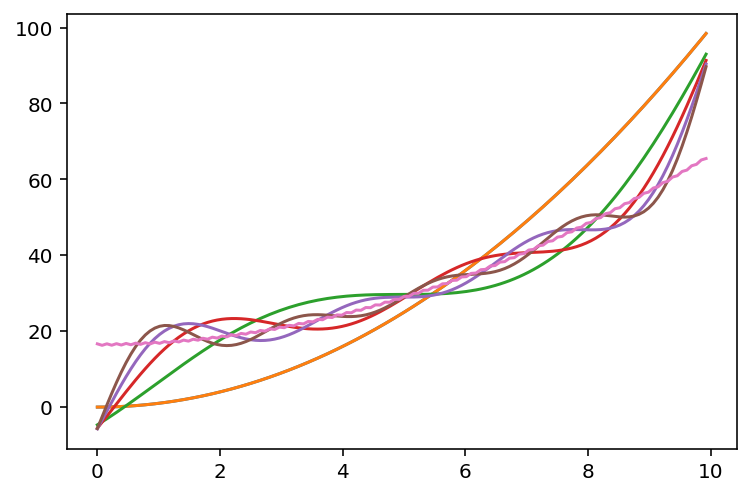

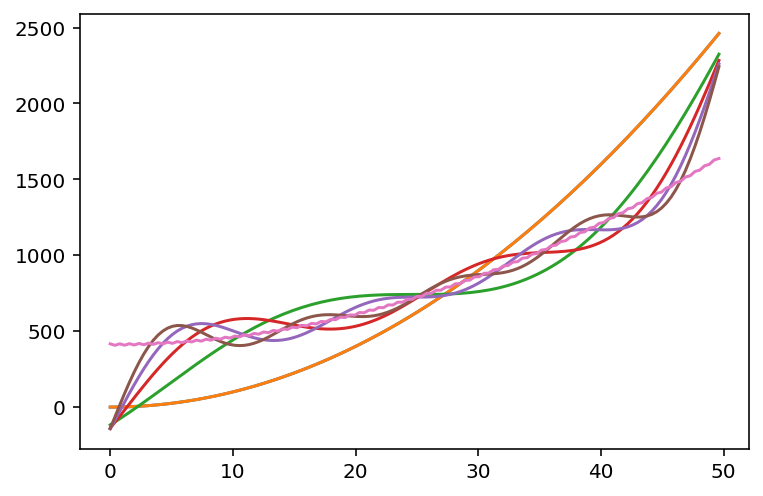

In [5]:
Plot(lambda x: x**2)
#разница видна при D < 0.7%

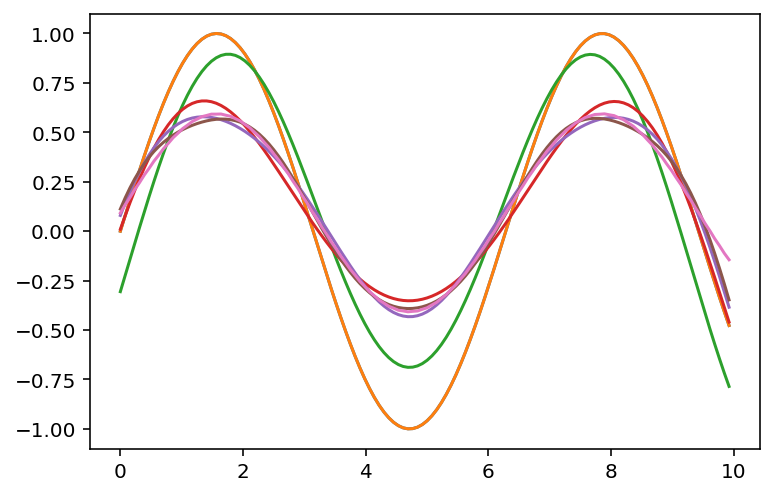

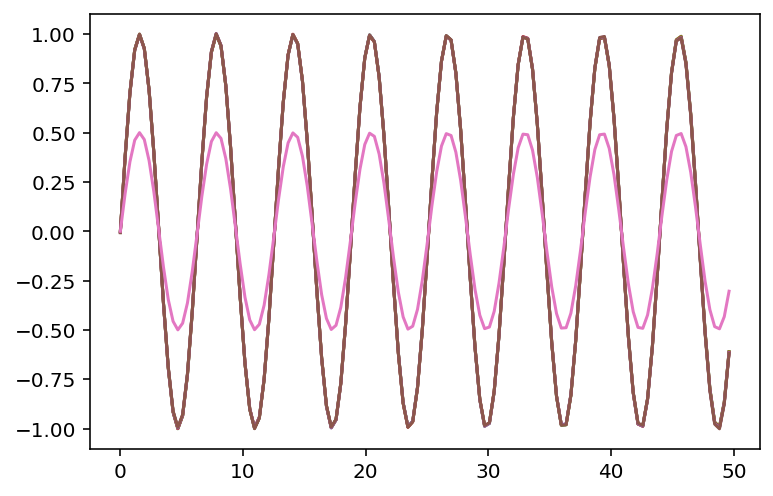

In [6]:
Plot(sin)
#разница видна при D < 0.7% (при достаточном приближении)

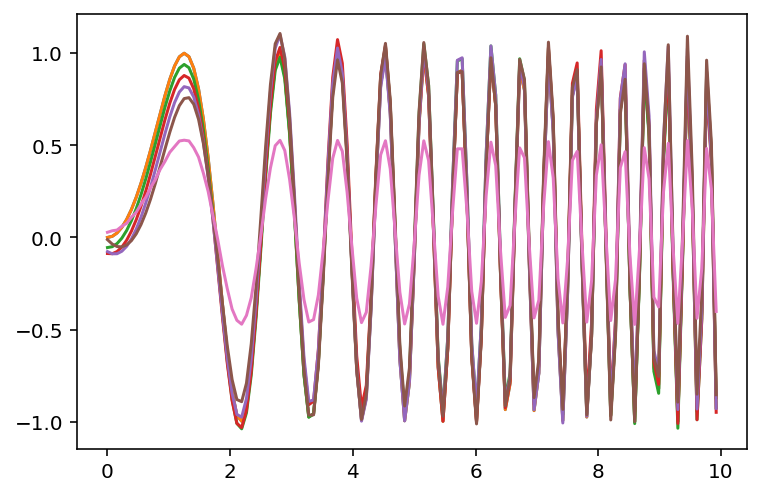

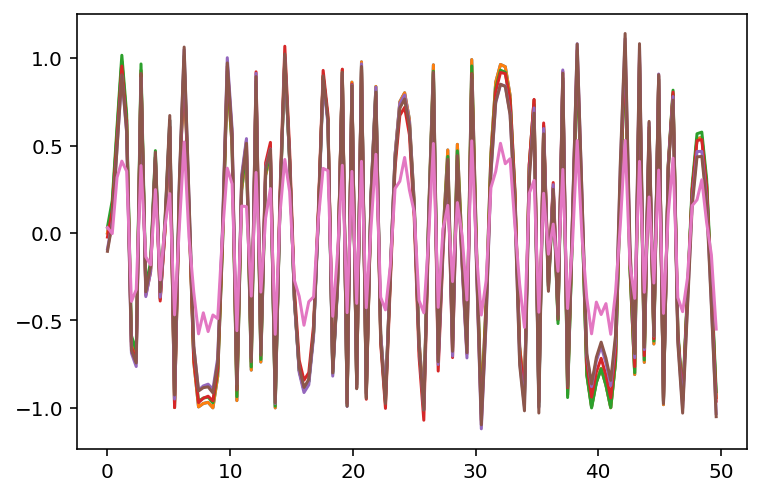

In [7]:
Plot(lambda x: sin(x**2))
#разница видна при D = 50%

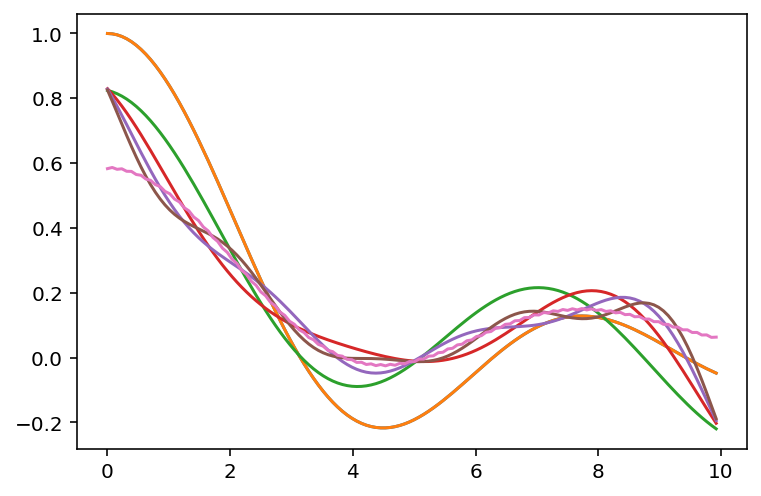

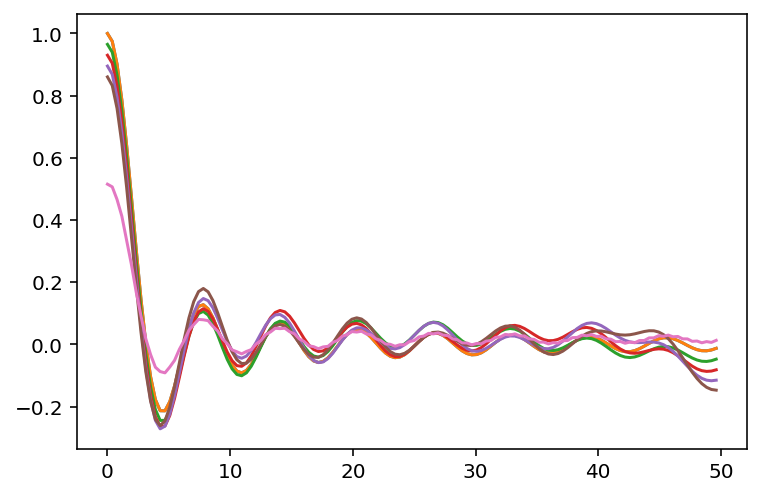

In [8]:
Plot(Function)
#разница видна при D < 0.7% (при достаточном приближении)